Number of  123


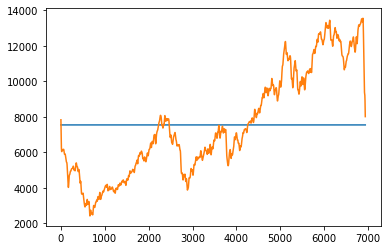

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
import pandas as pd
from numpy import loadtxt
from scipy.spatial import distance


dax_data = np.loadtxt("dax_data.txt", comments="#", delimiter="\n")
# plt.plot(dax_data)

coef_array = np.fft.rfft(dax_data)
time_step = 1

sample_freq = fft.fftfreq(dax_data.size, d=time_step)
amplitude = np.abs(coef_array)
amp_freq = np.array([amplitude,sample_freq])

# max_amp_position_array = np.argsort(amp_freq[0,:])[::-1]
# peak_freq = amp_freq[1,max_amp_position_array[0]]


def approximation(num_coef):
    copy_coef = list(np.absolute(coef_array))
    sorted_coefs_position = np.argsort(copy_coef)[-num_coef:]
    sorted_coefs_value = np.sort(copy_coef)[-num_coef:]
    zeros = np.zeros(coef_array.size, dtype='complex128')
    for i in range(num_coef):
        position = copy_coef.index(sorted_coefs_value[i])
        zeros[position] = coef_array[position]
    filtered_sig = np.fft.irfft(zeros)
    return filtered_sig
    

def best_approximation(average_absolute_difference):
    counter = 1
    while counter <= coef_array.size:
        approximated_data = approximation(counter)
        avg_abs_diff = np.average(np.absolute(approximated_data - dax_data))
        if avg_abs_diff > average_absolute_difference:
            counter += 1
        else:
            plt.plot(approximated_data)
            print('Number of ',counter)
            break
    

approximate = approximation(1)
plt.plot(approximate)

best_approximation(100)

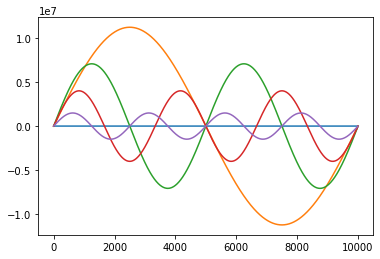

In [90]:
def create_signal(num_sig):
    i = 0
    while i<num_sig:
        n = 10000
        lx = 10
        omg = 2*np.pi/lx
        x = np.linspace(0,lx,n)
        amp = amp_freq[0][i]
        freq = amp_freq[1][i]
        signal = amp*np.sin(omg*i*x)
        plt.plot(signal)
        i += 1

create_signal(5)

In [52]:
a = np.array([10,23,45,2,0,5,78])

def approximation(num_coef):
    b = np.argsort(a)[-4:]
    print('b: ',b)
    print(b[num_coef-1])
    a[a < b[num_coef-1]] = 0
    print(a)
approximation(3)

b:  [0 1 2 6]
2
[10 23 45  2  0  5 78]


In [ ]:
#         copy_coef = coef_array.copy()
#         copy_coef[np.abs(sample_freq) > amp_freq[1,max_amp_position_array[counter]]] = 0
